In [82]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import os, psutil
from collections import Counter
import time

In [83]:
process = psutil.Process(os.getpid())

In [84]:
class KMeans:
    def __init__(self, k, thres = None, max_iter = 10, random_seed = 100) -> None: 
        self.data = {}
        self.D = 0
        self.content = None
        self.max_k = k 

        if thres == None :
            self.thres = 0.1
        else:
            self.thres = thres
        self.max_iter = max_iter
        self.random_seed = random_seed

    def store_data(self, k):
        self.data = {}
        for item in self.content[3:]:                                 # Initializing data in dictionary to make faster
            temp = list(map(int,item.split(" ")))
            docID = temp[0]
            wordID = temp[1]
            if docID in self.data.keys() : 
                self.data[docID].add(wordID)
            else:
                self.data[docID] = set()
                self.data[docID].add(wordID)
        random.seed(self.random_seed)                           # Stores Random State 
        clusters = random.sample(list(self.data.keys()), k=k)   
        return clusters    

    def jac_dist(self,keys1, keys2):
        return 1- len(self.data[keys1].intersection(self.data[keys2])) / len(self.data[keys1].union(self.data[keys2]))
    
    def check(self, centroid, centroid_new):
        total = 0
        for i in range(len(centroid)):
            key_1 = centroid[i]
            key_2 = centroid_new[i]
            total += self.jac_dist(key_1, key_2)
        if total <= self.thres:
            return True
        
    def create_clusters(self,clusters):
        inertia = 0
        my_doc_id = {}
        my_cluster = {}
        words = {}
        for keys in self.data.keys():
            minimum = np.inf
            clust = None
            for clt in clusters:
                dist = self.jac_dist(keys, clt)
                if minimum > dist:
                    minimum = dist
                    clust = clt
            inertia += minimum
            my_cluster[keys] = (clust, minimum)
            if clust in my_doc_id.keys():
                my_doc_id[clust].append(keys)
            else:
                my_doc_id[clust] = []
            if clust in words.keys():
                words[clust] += list(self.data[keys])
            else:
                words[clust] = []
        return my_doc_id, inertia, words

    def update_clusters(self,my_doc_id, words):
        clusters = []
        for clt in my_doc_id.keys():
            count_words = Counter(words[clt])
            top_words = count_words.most_common(int(len(words[clt])/len(my_doc_id[clt]))+1)
            temp = set([w for w, c in top_words])
            self.D += 1
            self.data[self.D] = temp
            clusters.append(self.D)
        return clusters

    def main(self, content):

        with open(f"data/docword.{content}.txt") as XYZ:                                 
            self.content = XYZ.readlines()
        self.D = int(self.content[0].replace('\n',""))

        k_means = {}
        for k in tqdm(range(2,self.max_k+1)): 
            clusters = self.store_data(k)                   
            for _ in range(self.max_iter):
                my_doc_id, inertia, words = self.create_clusters(clusters)
                clusters_new = self.update_clusters(my_doc_id, words)
                if self.check(clusters, clusters_new):
                    break
                clusters = clusters_new
            k_means[k] = inertia
 
        plt.figure(figsize=(8,5))  
        plt.plot(k_means.keys(), k_means.values(), marker='o', linestyle='-', 
                color='b', markerfacecolor='#ff7f0e', markersize=7)  
        plt.xlabel("Number of Clusters (K)", fontsize=11)  
        plt.ylabel("Inertia", fontsize=11)  
        plt.title(f"Inertia vs Number of Clusters for {content}", fontsize=12)  
        plt.xticks(fontsize=8) 
        plt.yticks(fontsize=8)  
        plt.grid(True, linestyle='--', alpha=0.7)  
        plt.tight_layout()  
        plt.show()

#### Driver Code <br>

a) KOS

In [85]:
threshold = 0.2
seed = 100
obj = KMeans(13,threshold,max_iter=100,random_seed=seed)

100%|██████████| 12/12 [00:50<00:00,  4.20s/it]


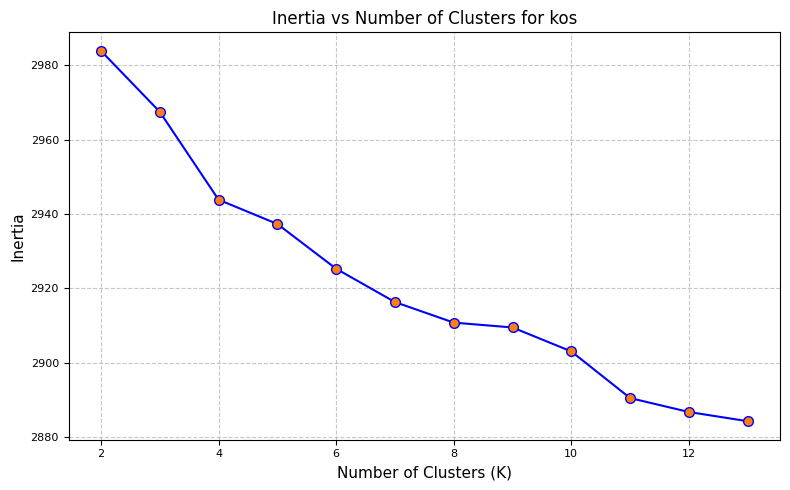

Results for Threshold = 0.2 and seed = 100
Space taken: 10384.0 KB
Time taken: 50.72899842262268 seconds


In [86]:
start_time = time.time()
start_mem = process.memory_info().rss
obj.main('kos')
end_mem = process.memory_info().rss
print(f"Results for Threshold = {threshold} and seed = {seed}")
print(f'Space taken: {round(end_mem - start_mem)/1024} KB')
end_time = time.time()
print("Time taken:", (end_time - start_time), "seconds")

b) Nips

In [87]:
threshold = 0.1
seed = 56
obj = KMeans(14,threshold,max_iter=100,random_seed=seed)

100%|██████████| 13/13 [01:53<00:00,  8.71s/it]


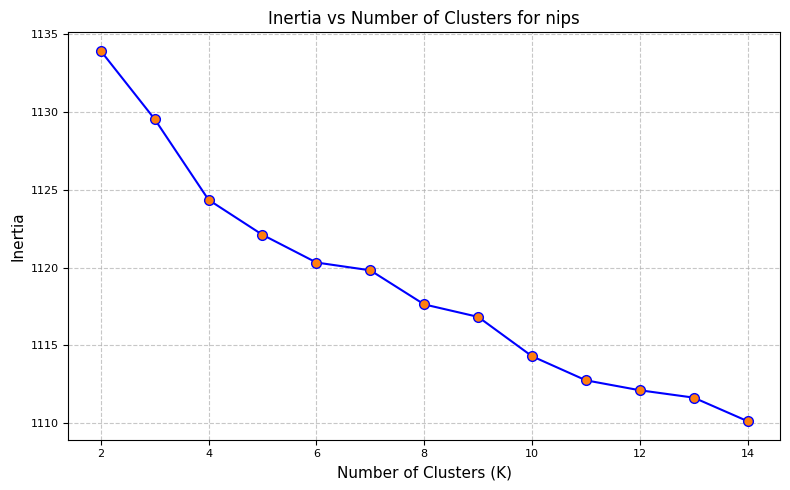

Results for Threshold = 0.1 and seed = 56
Space taken: 5148.0 KB
Time taken: 113.64544677734375 seconds


In [88]:
start_time = time.time()
start_mem = process.memory_info().rss
obj.main('nips')
end_mem = process.memory_info().rss
print(f"Results for Threshold = {threshold} and seed = {seed}")
print(f'Space taken: {round(end_mem - start_mem)/1024} KB')
end_time = time.time()
print("Time taken:", (end_time - start_time), "seconds")

c) Enron

In [89]:
threshold = 0.1
seed = 69
obj = KMeans(11,threshold,max_iter=100,random_seed=seed)

100%|██████████| 10/10 [05:44<00:00, 34.47s/it]


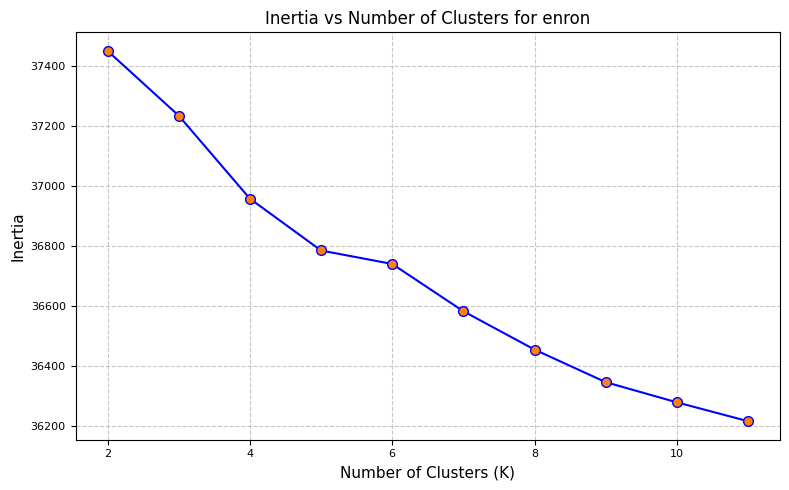

Results for Threshold = 0.1 and seed = 69
Space taken: 371428.0 KB
Time taken: 345.31082558631897 seconds


In [90]:
start_time = time.time()
start_mem = process.memory_info().rss
obj.main('enron')
end_mem = process.memory_info().rss
print(f"Results for Threshold = {threshold} and seed = {seed}")
print(f'Space taken: {round(end_mem - start_mem)/1024} KB')
end_time = time.time()
print("Time taken:", (end_time - start_time), "seconds")

##### End - Look into Readme.md for explanation